In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [2]:
url = "http://books.toscrape.com/"

In [3]:
response = requests.get(url)

In [4]:
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
soup

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [6]:
books_html = soup.find_all("article", class_="product_pod")

In [7]:
len(books_html)

20

## Parsing _one_ book

In [8]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [9]:
book_title = books_html[0].find("h3").find("a").attrs['title']

In [10]:
book_price = float(books_html[0].find("p", class_="price_color").string[1:])

In [11]:
book_star_rating = books_html[0].find("p", class_="star-rating").attrs['class']

In [12]:
book_star_rating

['star-rating', 'Three']

In [13]:
def parse_rating(rating_classes):
    if "One" in rating_classes:
        return 1
    elif "Two" in rating_classes:
        return 2
    elif "Three" in rating_classes:
        return 3
    elif "Four" in rating_classes:
        return 4
    elif "Five" in rating_classes:
        return 5
    else:
        return 0

In [14]:
parse_rating(book_star_rating)

3

In [15]:
book_star_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])

## Parsing All Books

In [16]:
books_dict = {'Title': [], 'Price': [], 'Rating': []}

In [17]:
for book in books_html:
    title = book.find("h3").find("a").attrs['title']
    price = float(book.find("p", class_="price_color").text[1:])
    rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
    books_dict['Title'].append(title)
    books_dict['Price'].append(price)
    books_dict['Rating'].append(rating)     

In [18]:
len(books_dict['Rating'])

20

In [22]:
books_df = pd.DataFrame.from_dict(books_dict)

In [23]:
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


<AxesSubplot:xlabel='Rating'>

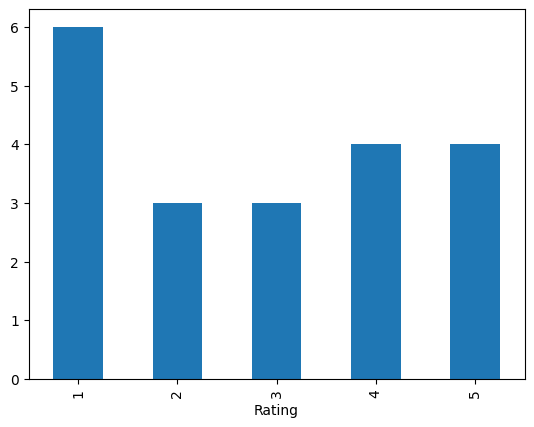

In [24]:
books_df.groupby('Rating').count()['Price'].plot(kind="bar")

## All Pages

In [27]:
page = 1
url = f'http://books.toscrape.com/catalogue/page-{page}.html'

In [28]:
all_books_dict = {'Title': [], 'Price': [], 'Rating': []}

In [30]:
MAX_PAGE = 50
for page in range(1, MAX_PAGE+1):
    url = f'http://books.toscrape.com/catalogue/page-{page}.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    all_books_html = soup.find_all("article", class_="product_pod")
    
    for book in all_books_html:
        title = book.find("h3").find("a").attrs['title']
        price = float(book.find("p", class_="price_color").text[1:])
        rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
        all_books_dict['Title'].append(title)
        all_books_dict['Price'].append(price)
        all_books_dict['Rating'].append(rating) 
    

In [31]:
len(all_books_dict['Rating'])

2000

In [32]:
all_books_df = pd.DataFrame(all_books_dict)

In [33]:
all_books_df.tail()

,Title,Price,Rating
1995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1
1996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4
1997,A Spy's Devotion (The Regency Spies of London #1),16.97,5
1998,1st to Die (Women's Murder Club #1),53.98,1
1999,"1,000 Places to See Before You Die",26.08,5


<AxesSubplot:>

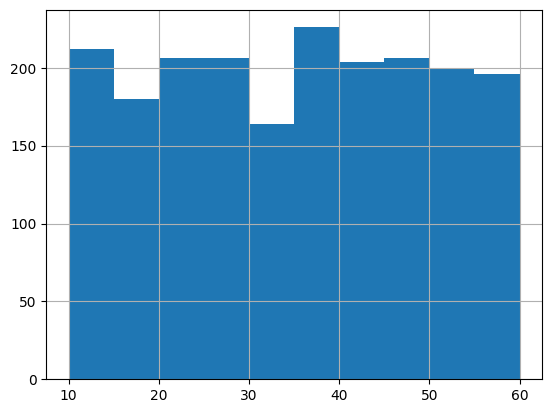

In [34]:
all_books_df['Price'].hist(bins=10)

<AxesSubplot:xlabel='Rating'>

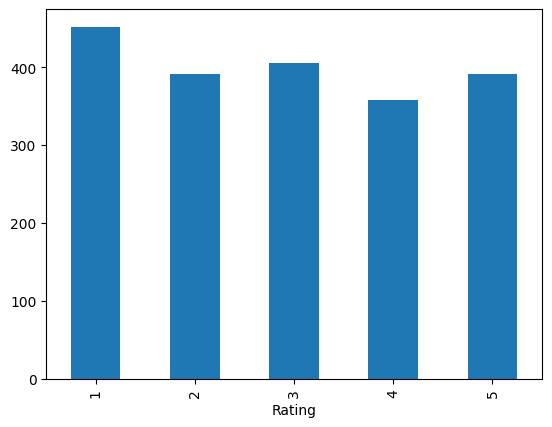

In [35]:
all_books_df.groupby('Rating').count()['Title'].plot(kind='bar')

In [36]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    books_dict=books_dict,
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-book_scraping/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.57s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git push origin master



In [116]:
all_books_df.to_csv("books.csv")